In [9]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
import textblob

In [10]:
csvreader = csv.reader("textEmotions.zip")
df = pd.read_csv("TextEmotions.zip")
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
df.shape

(21459, 2)

In [12]:
df.dtypes

Text       object
Emotion    object
dtype: object

In [13]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [14]:
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

<AxesSubplot:>

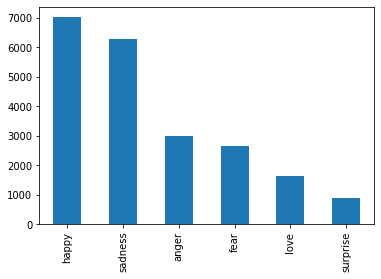

In [15]:
df['Emotion'].value_counts().plot(kind='bar')

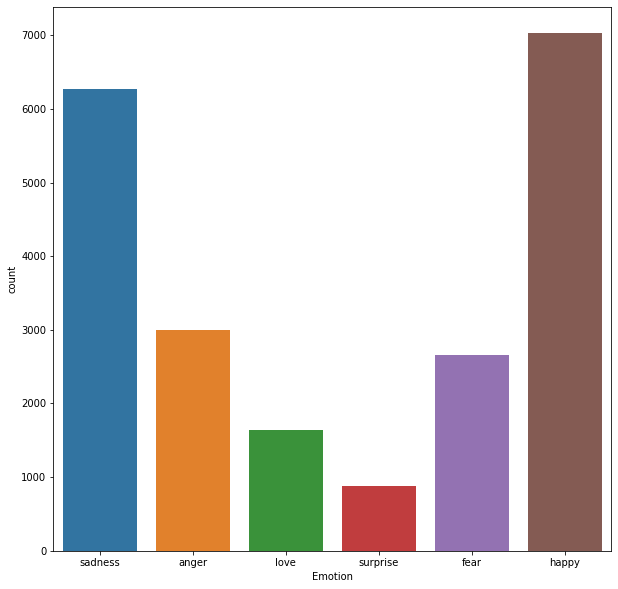

In [16]:
#using seaborn to plot
plt.figure(figsize=(10,10))
sns.countplot(x='Emotion',data=df)
plt.show()

In [17]:
#sentiment analysis
from textblob import TextBlob

In [18]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result
#tex fxn
get_sentiment("I Love Coding")

'Positive'

In [19]:
df['Sentiment'] = df['Text'].apply(get_sentiment)
df.head()

,Text,Emotion,Sentiment
0,i didnt feel humiliated,sadness,Neutral
1,i can go from feeling so hopeless to so damned...,sadness,Neutral
2,im grabbing a minute to post i feel greedy wrong,anger,Negative
3,i am ever feeling nostalgic about the fireplac...,love,Negative
4,i am feeling grouchy,anger,Neutral


In [20]:
#compare emotion vs sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1390
          Neutral       806
          Positive      797
fear      Negative     1153
          Neutral       665
          Positive      834
happy     Negative      781
          Neutral      1035
          Positive     5213
love      Negative      318
          Neutral       234
          Positive     1089
sadness   Negative     2934
          Neutral      1592
          Positive     1739
surprise  Negative      329
          Neutral       152
          Positive      398
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

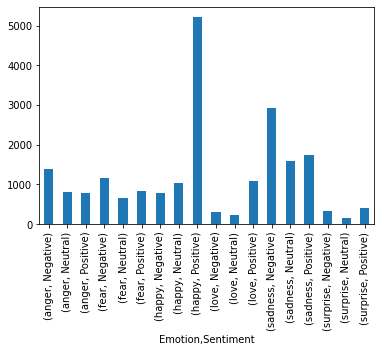

In [21]:
#using matplotlib
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


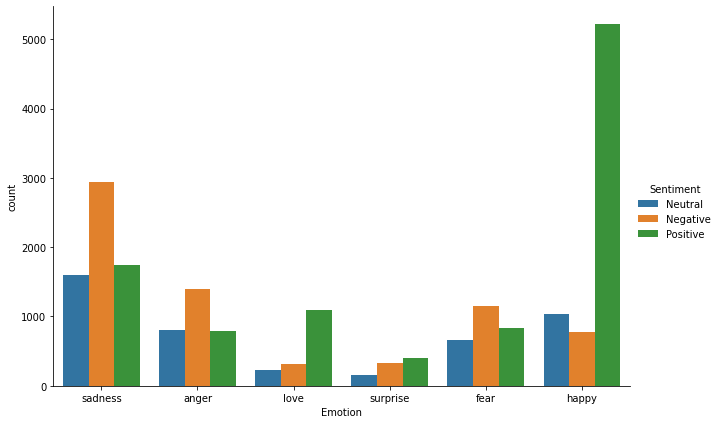

In [22]:
#using seaborn
sns.factorplot
sns.catplot
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

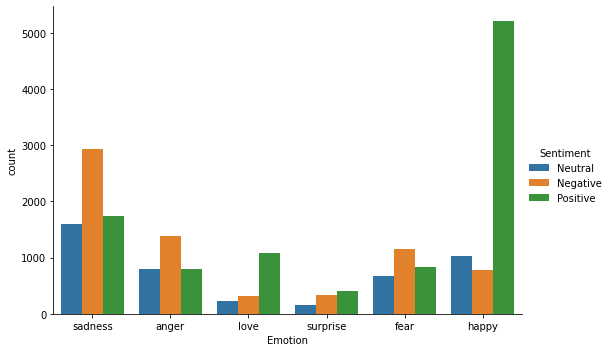

In [23]:
#using catplot
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',aspect=1.5)

In [24]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [25]:
df['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [26]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_multiple_spaces)

In [27]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_bad_quotes)

In [28]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_special_characters)

In [29]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,i didnt feel humiliated,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,i am feeling grouchy
...,...,...
21454,Melissa stared at her friend in dism,Melissa stared at her friend in dism
21455,Successive state elections have seen the gover...,Successive state elections have seen the gover...
21456,Vincent was irritated but not dismay,Vincent was irritated but not dismay
21457,Kendall-Hume turned back to face the dismayed ...,KendallHume turned back to face the dismayed coup


In [30]:
#extrcat most common word per class of emotion
from collections import Counter
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [31]:
#list of emotions
emotion_list = df['Emotion'].unique().tolist()
emotion_list

['sadness', 'anger', 'love', 'surprise', 'fear', 'happy']

In [32]:
df[df['Emotion'] == 'happy']

,Text,Emotion,Sentiment,Clean_Text
8,i have been with petronas for years i feel tha...,happy,Positive,i have been with petronas for years i feel tha...
11,i do feel that running is a divine experience ...,happy,Neutral,i do feel that running is a divine experience ...
14,i have immense sympathy with the general point...,happy,Positive,i have immense sympathy with the general point...
15,i do not feel reassured anxiety is on each side,happy,Neutral,i do not feel reassured anxiety is on each side
22,i have the feeling she was amused and delighted,happy,Positive,i have the feeling she was amused and delighted
...,...,...,...,...
20263,"He uttered a short sharp bark , which made Ros...",happy,Negative,He uttered a short sharp bark which made Rosi...
20264,"He considered this thoughtfully , then a gleam...",happy,Positive,He considered this thoughtfully then a gleam ...
20265,A look of intense amusement crossed Catherine ...,happy,Positive,A look of intense amusement crossed Catherine s f
20266,As a toddler she filled in concentric circles ...,happy,Positive,As a toddler she filled in concentric circles ...


In [33]:
df[df['Emotion'] == 'fear']

,Text,Emotion,Sentiment,Clean_Text
7,i feel as confused about life as a teenager or...,fear,Negative,i feel as confused about life as a teenager or...
19,i now feel compromised and skeptical of the va...,fear,Negative,i now feel compromised and skeptical of the va...
21,i am feeling completely overwhelmed i have two...,fear,Positive,i am feeling completely overwhelmed i have two...
31,i remember feeling acutely distressed for a fe...,fear,Positive,i remember feeling acutely distressed for a fe...
53,i was stymied a little bit as i wrote feeling ...,fear,Negative,i was stymied a little bit as i wrote feeling ...
...,...,...,...,...
21454,Melissa stared at her friend in dism,fear,Neutral,Melissa stared at her friend in dism
21455,Successive state elections have seen the gover...,fear,Neutral,Successive state elections have seen the gover...
21456,Vincent was irritated but not dismay,fear,Neutral,Vincent was irritated but not dismay
21457,Kendall-Hume turned back to face the dismayed ...,fear,Neutral,KendallHume turned back to face the dismayed coup


In [34]:
df[df['Emotion'] == 'fear']['Clean_Text']

7        i feel as confused about life as a teenager or...
19       i now feel compromised and skeptical of the va...
21       i am feeling completely overwhelmed i have two...
31       i remember feeling acutely distressed for a fe...
53       i was stymied a little bit as i wrote feeling ...
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    KendallHume turned back to face the dismayed coup
21458                       I am dismayed  but not surpris
Name: Clean_Text, Length: 2652, dtype: object

In [35]:
happy_list = df[df['Emotion'] == 'fear']['Clean_Text'].tolist()

In [36]:
#happy doc
happy_docx = ''.join(happy_list)

In [37]:
happy_docx

'i feel as confused about life as a teenager or as jaded as a year old mani now feel compromised and skeptical of the value of every unit of work i put ini am feeling completely overwhelmed i have two strategies that help me to feel grounded pour my heart out in my journal in the form of a letter to god and then end with a list of five things i am most grateful fori remember feeling acutely distressed for a few daysi was stymied a little bit as i wrote feeling unsure that i might go somewhere with the story unintendedi feel like we are pressured into being young beautiful thin and depending on the trend having the girls rejuvenated or butt implantsi began having them several times a week feeling tortured by the hallucinations moving people and figures sounds and vibrationsi will be able to lay on my bed in the dark and not feel terrified at least for a whilei had begun to feel apprehensive when thick black rain clouds stormed into the sky above towni had stated to her the reason i feel

In [38]:
#extract keywords
keyword_happy = extract_keywords(happy_docx)

In [39]:
keyword_happy

{'i': 1717,
 'feel': 1483,
 'to': 1478,
 'the': 1476,
 'and': 1468,
 'a': 1089,
 'feeling': 918,
 'of': 884,
 'that': 687,
 'my': 657,
 'in': 557,
 'was': 477,
 'about': 435,
 'it': 405,
 'but': 385,
 'so': 360,
 'am': 334,
 'like': 320,
 'with': 296,
 'this': 289,
 'have': 277,
 'is': 274,
 'me': 271,
 'for': 268,
 'not': 268,
 'as': 254,
 'on': 249,
 'at': 237,
 'or': 229,
 'when': 228,
 'just': 224,
 'be': 219,
 'by': 206,
 'because': 200,
 'little': 191,
 'im': 186,
 'you': 176,
 'do': 165,
 'very': 162,
 'up': 156,
 'more': 150,
 'can': 148,
 't': 144,
 'all': 143,
 'what': 140,
 'bit': 138,
 'know': 137,
 'had': 134,
 'are': 130,
 'from': 129}

In [115]:
#plot
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['tokens','count'])
    plt.figure(figsize=(20,10))
    plt.title("plot of {} Most common keywords".format(emotion_name))
    sns.barplot(x='tokens',y='count',data=df_01)
    plt.xtricks(rotation=45)
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtricks'

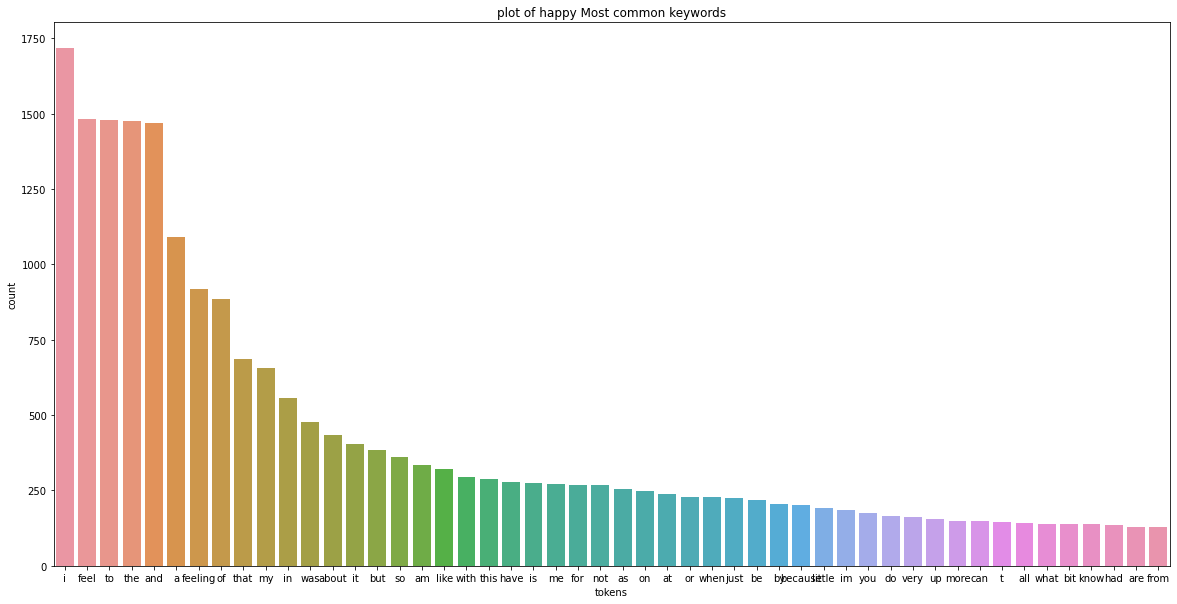

In [113]:
plot_most_common_words(keyword_happy,"happy")

In [116]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_docx = ''.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtricks'

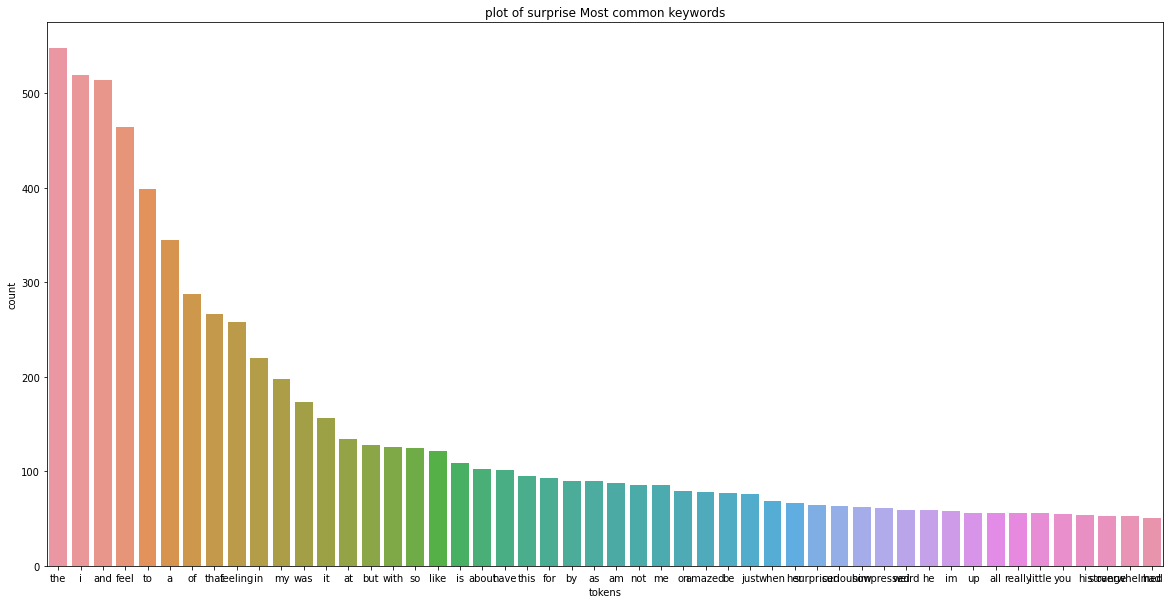

In [81]:
plot_most_common_words(keyword_surprise,"surprise")

In [90]:
#machine learning
#load ML pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [91]:
#Plot our Dataset
from sklearn.model_selection import train_test_split

In [92]:
#build features from our Text
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [94]:
#vectorizer
cv = CountVectorizer()
cv.fit_transform(Xfeatures)

<21459x19282 sparse matrix of type '<class 'numpy.int64'>'
	with 333963 stored elements in Compressed Sparse Row format>

In [95]:
#get features by name
cv.get_feature_names()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '11',
 '1295',
 '13',
 '15',
 '15yearold',
 '1878',
 '18years',
 '19',
 '191523',
 '1917',
 '1926',
 '1929',
 '1974',
 '1975',
 '1978',
 '1980',
 '1980s',
 '1984',
 '1986',
 '1987',
 '1989',
 '1991',
 '1992',
 '199394',
 '19th',
 '200000',
 '20th',
 '21',
 '23monthold',
 '23r',
 '24',
 '30',
 '32',
 '33',
 '34',
 '35',
 '37574',
 '40000',
 '403',
 '40th',
 '46',
 '48',
 '50',
 '500',
 '55',
 '70',
 '75th',
 '82ndminute',
 '9th',
 'aa',
 'aaaaaaand',
 'aaaaand',
 'aaaah',
 'aaaand',
 'aac',
 'aahhh',
 'aaron',
 'ab',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abated',
 'abba',
 'abbigail',
 'abc',
 'abd',
 'abdomen',
 'abdominal',
 'abducted',
 'abelard',
 'abhorrent',
 'abide',
 'abigail',
 'abilities',
 'ability',
 'abit',
 'abjectly',
 'able',
 'ableness',
 'ablo',
 'abnormally',
 'aboard',
 'abominable',
 'abortion',
 'abou',
 'abound',
 'about',
 'above',
 'abraham',
 'abroad',
 'abruptly',
 'absence',
 'absoloutely',
 'absolute',
 'absolutely',
 'absolutly'

In [96]:
#split dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [97]:
from sklearn.pipeline import Pipeline

In [98]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [99]:
pipe_lr.fit(x_train,y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [100]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [101]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.887542715128922

In [103]:
ex1 = "This book was so interesting it made me happy"

In [104]:
pipe_lr.predict([ex1])

array(['happy'], dtype=object)

In [105]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.08920166, 0.03584751, 0.63561194, 0.01830739, 0.20588167,
        0.01514983]])

In [106]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'fear', 'happy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [107]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()